Wall time: 0 ns


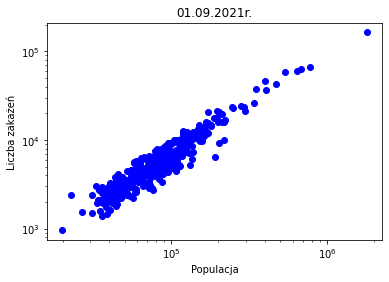

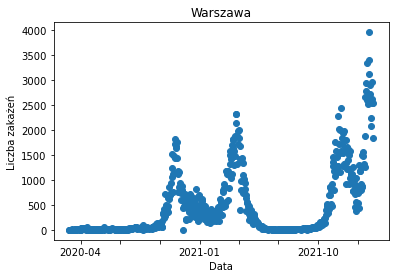

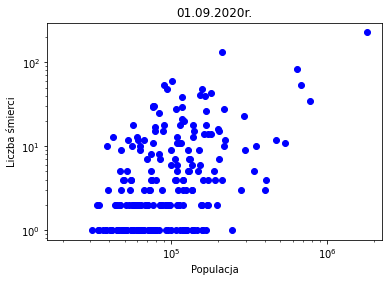

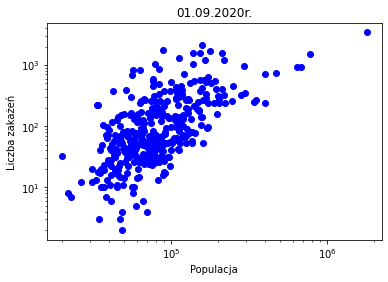

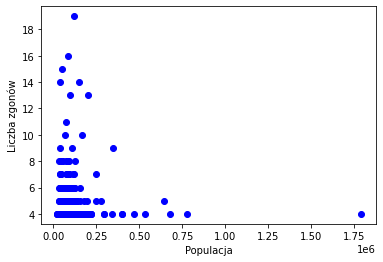

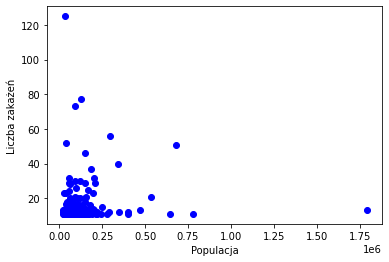

a = 0.4208087300534298
b = -0.0773522775397053
R^2 = 0.12817976328306224
p = 1.7681540776053984e-12


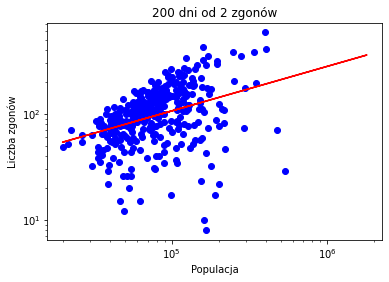

a = 0.191446524113569
b = 2.074309364033479
R^2 = 0.0111567527150084
p = 0.04174290700060827


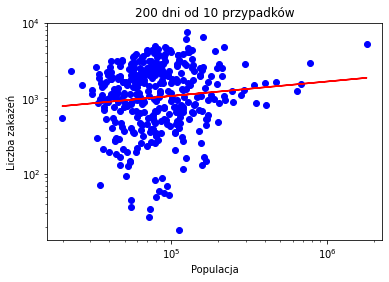

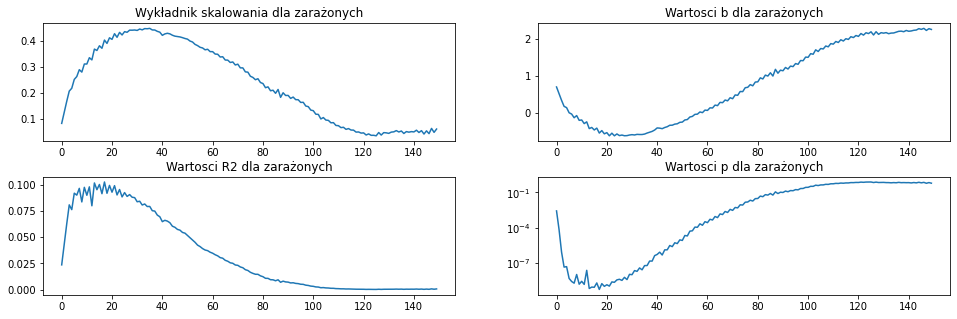

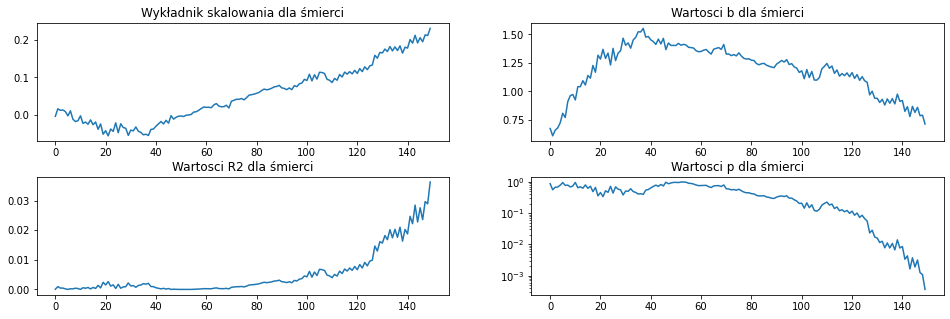

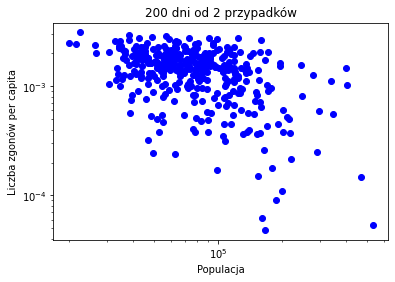

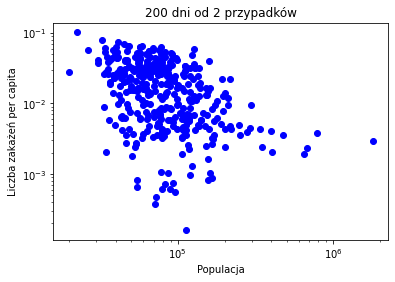

[]


In [1]:
%time
%run glownykod.ipynb

In [ ]:
which_district = "m.warszawa"
fig, ax = plt.subplots()
plt.plot_date(infections[infections.district == which_district]["date"], infections[infections.district == which_district]["infected_total"])
plt.xlabel('Data')
#plt.xticks([])
plt.ylabel('Liczba zakażeń')
every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.title("Warszawa")

In [ ]:
which_district = "m.warszawa"
fig, ax = plt.subplots()
plt.plot_date(deaths[deaths.district == which_district]["date"], deaths[deaths.district == which_district]["dead_total"])
plt.xlabel('Data')
plt.ylabel('Liczba śmierci')
every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.title("Warszawa")

In [ ]:
x = infections2.loc[infections2['date'] == '2021-09-01', 'population']
y = infections2.loc[infections2['date'] == '2021-09-01', 'infected_total']

plt.plot(x, y, 'bo')
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Populacja')
plt.ylabel('Liczba zakażeń')
plt.title("01.09.2021r.")

In [ ]:
which_district = "warszawa"
fig, ax = plt.subplots()
plt.plot_date(infections[infections.district == which_district]["date"], infections[infections.district == which_district]["new_infected"])
plt.xlabel('Data')
#plt.xticks([])
plt.ylabel('Liczba zakażeń')
every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.title("Warszawa")

Text(0.5, 1.0, '01.09.2020r.')

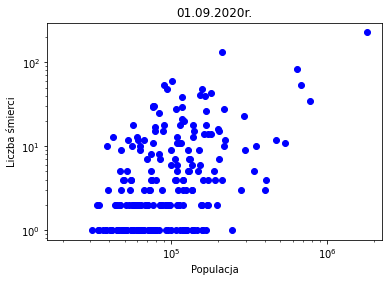

In [2]:
x = deaths.loc[deaths['date'] == '2020-09-01', 'population']
y = deaths.loc[deaths['date'] == '2020-09-01', 'dead_total']

plt.plot(x, y, 'bo')
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Populacja')
plt.ylabel('Liczba śmierci')
plt.title("01.09.2020r.")

Text(0.5, 1.0, '01.09.2020r.')

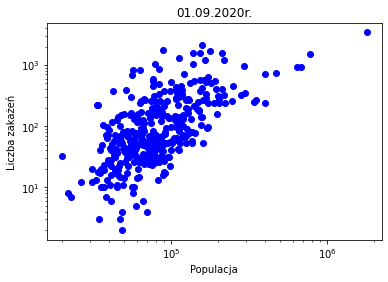

In [3]:
x = infections.loc[infections['date'] == '2020-09-01', 'population']
y = infections.loc[infections['date'] == '2020-09-01', 'infected_total']

plt.plot(x, y, 'bo')
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Populacja')
plt.ylabel('Liczba zakażeń')
plt.title("01.09.2020r.")

Text(0, 0.5, 'Liczba zgonów')

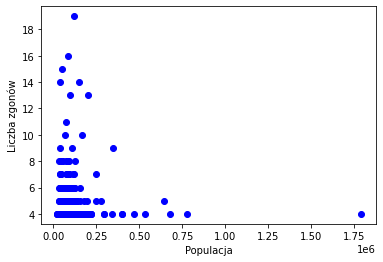

In [4]:
# Ile śmierci w pierwszy dzień pandemii
x = deaths.loc[deaths['pandemic_day'] == 0, 'population']
y = deaths.loc[deaths['pandemic_day'] == 0, 'dead_total']

plt.plot(x, y, 'bo')
plt.xlabel('Populacja')
plt.ylabel('Liczba zgonów')

#tutaj widać, że przez wybrakowane dane na początku, niektóre powiaty w pierwszy dzień mają dużo zakażonych 
#(zweryfikowałem, tak jest w danych)

In [5]:
#print_full(infections.loc[infections['district'] == "dolnośląskie"])
#print_full(infections.loc[infections['pandemic_day'] == 0])
#print_full(infections.loc[infections['district'] == "augustowski"])
#print_full(infections.loc[infections['district'] == "dolnośląskie"])

Text(0, 0.5, 'Liczba zakażeń')

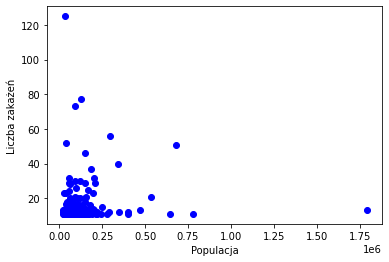

In [6]:
# Ile zakażonych w pierwszy dzień pandemii
x = infections.loc[infections['pandemic_day'] == 0, 'population']
y = infections.loc[infections['pandemic_day'] == 0, 'infected_total']

plt.plot(x, y, 'bo')
plt.xlabel('Populacja')
plt.ylabel('Liczba zakażeń')

#tutaj widać, że przez wybrakowane dane na początku, niektóre powiaty w pierwszy dzień mają dużo zakażonych 
#(zweryfikowałem, tak jest w danych)

a = 0.4208087300534298
b = -0.0773522775397053
R^2 = 0.12817976328306224
p = 1.7681540776053984e-12


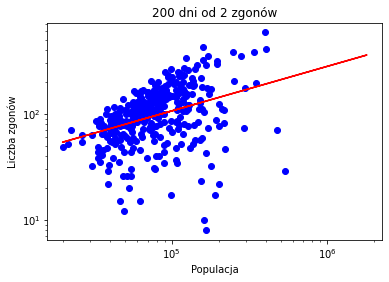

In [7]:
#264 dni z danych
# do prezentacji 
x = deaths.loc[deaths['pandemic_day'] == 200, 'population']
y = deaths.loc[deaths['pandemic_day'] == 200, 'dead_total']

a, b, r, p, std_err = fit_n_plot_loglog_scipy(x, y, "200 dni od 2 zgonów", "Liczba zgonów")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

a = 0.191446524113569
b = 2.074309364033479
R^2 = 0.0111567527150084
p = 0.04174290700060827


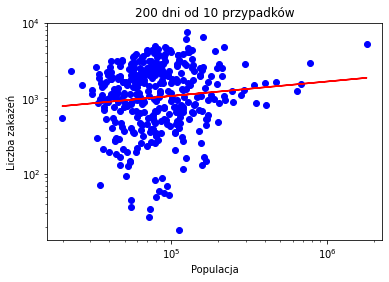

In [8]:
#264 dni z danych
# do prezentacji 
x = infections.loc[infections['pandemic_day'] == 200, 'population']
y = infections.loc[infections['pandemic_day'] == 200, 'infected_total']

#fit_n_plot_loglog(x, y, "200 dni od 10 przypadków", "Liczba zakażeń")
a, b, r, p, std_err = fit_n_plot_loglog_scipy(x, y, "200 dni od 10 przypadków", "Liczba zakażeń")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

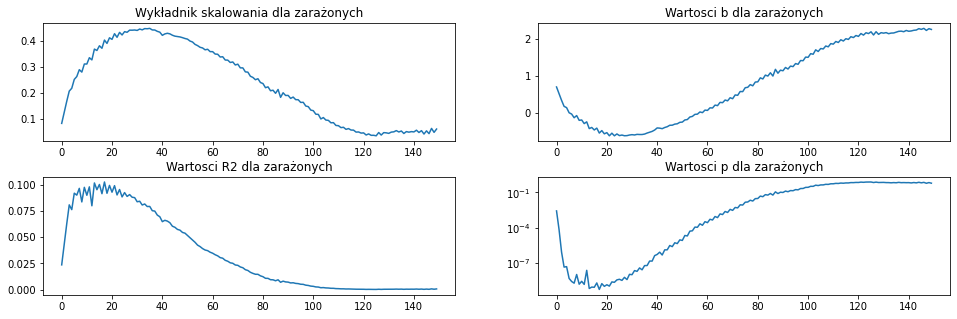

In [9]:
#
days_num = 150
wykladniki = []
wartosci_R2 = []
wartosci_p = []
wartosci_b = []
for i in range(days_num):
    x = infections.loc[infections['pandemic_day'] == i, 'population']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_total']
    #a = fit_loglog(x, y)
    a, b, r, p = fit_loglog_scipy(x, y)
    wykladniki.append(a)
    wartosci_b.append(b)
    wartosci_R2.append(r*r)
    wartosci_p.append(p)

#print(len(wykladniki)) 

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
fig.subplots_adjust(left=0.2, hspace = 0.3)
ax[0,0].plot(range(days_num), wykladniki, label='a')
ax[0,0].title.set_text('Wykładnik skalowania dla zarażonych')
ax[0,1].plot(range(days_num), wartosci_b, label='b')
ax[0,1].title.set_text('Wartosci b dla zarażonych')
ax[1,0].plot(range(days_num), wartosci_R2, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla zarażonych')

ax[1,1].plot(range(days_num), wartosci_p, label='p')
ax[1,1].title.set_text('Wartosci p dla zarażonych')
ax[1,1].set_yscale("log")

#print(wartosci_p)
#plt.scatter(range(days_num), wykladniki, s=20)
#plt.ylim(0, 1)
# plt.title("Wykładnik skalowania dla zarażonych")
# plt.xlabel('Dni od rozpoczęcia pandemii')
# plt.ylabel("Wykładnik skalowania")
#plt.scatter(range(days_num), wartosci_R2, s=20)
#plt.scatter(range(days_num), wartosci_p, s=20)

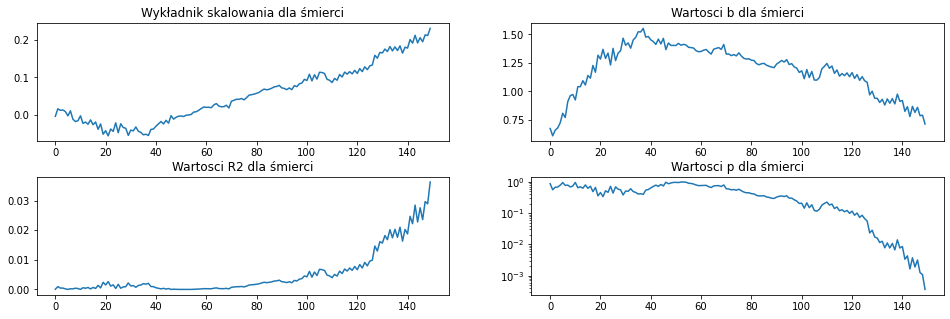

In [10]:
#
days_num = 150
wykladniki = []
wartosci_R2 = []
wartosci_p = []
wartosci_b = []
for i in range(days_num):
    x = deaths.loc[deaths['pandemic_day'] == i, 'population']
    y = deaths.loc[deaths['pandemic_day'] == i, 'dead_total']
    #a = fit_loglog(x, y)
    a, b, r, p = fit_loglog_scipy(x, y)
    wykladniki.append(a)
    wartosci_b.append(b)
    wartosci_R2.append(r*r)
    wartosci_p.append(p)
    
#print(len(wykladniki)) 

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
fig.subplots_adjust(left=0.2, hspace = 0.3)
ax[0,0].plot(range(days_num), wykladniki, label='a')
ax[0,0].title.set_text('Wykładnik skalowania dla śmierci')
ax[0,1].plot(range(days_num), wartosci_b, label='b')
ax[0,1].title.set_text('Wartosci b dla śmierci')
ax[1,0].plot(range(days_num), wartosci_R2, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla śmierci')

ax[1,1].plot(range(days_num), wartosci_p, label='p')
ax[1,1].title.set_text('Wartosci p dla śmierci')
ax[1,1].set_yscale("log")

# plt.scatter(range(days_num), wykladniki, s=20)
# plt.ylim(0, 1)
# plt.title("Wykładnik skalowania dla śmierci")
# plt.xlabel('Dni od rozpoczęcia pandemii')
# plt.ylabel("Wykładnik skalowania")



Text(0, 0.5, 'Liczba zgonów per capita')

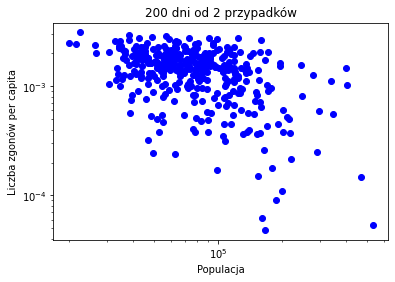

In [11]:
# do prezentacji 
x = deaths.loc[deaths['pandemic_day'] == 200, 'population']
y = deaths.loc[deaths['pandemic_day'] == 200, 'dead_total']

y = y / x
plt.plot(x, y, 'bo')
plt.title("200 dni od 2 przypadków")
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Populacja')
plt.ylabel('Liczba zgonów per capita')

Text(0, 0.5, 'Liczba zakażeń per capita')

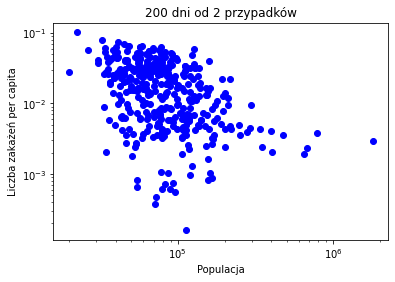

In [12]:
# do prezentacji 
x = infections.loc[infections['pandemic_day'] == 200, 'population']
y = infections.loc[infections['pandemic_day'] == 200, 'infected_total']

y = y / x
plt.plot(x, y, 'bo')
plt.title("200 dni od 2 przypadków")
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Populacja')
plt.ylabel('Liczba zakażeń per capita')